In [1]:
%matplotlib inline


# A demo of the mean-shift clustering algorithm


Reference:

Dorin Comaniciu and Peter Meer, "Mean Shift: A robust approach toward
feature space analysis". IEEE Transactions on Pattern Analysis and
Machine Intelligence. 2002. pp. 603-619.




In [3]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [18]:
# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = make_blobs(n_samples=1000, centers=centers, cluster_std=0.6)
X

array([[-0.17621263, -1.05230526],
       [ 1.38661833,  0.78309966],
       [-1.79999411, -1.1015103 ],
       ...,
       [ 1.3845992 , -0.60765548],
       [ 0.79484718, -0.49796634],
       [ 1.69400467, -1.11591235]])

In [19]:
_

array([1, 0, 1, 0, 2, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 1, 1, 0, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 0, 2, 1, 2, 2, 2, 0, 0,
       0, 0, 1, 1, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 1,
       0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0,
       2, 0, 1, 2, 2, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 0, 0,
       0, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 2, 0, 0, 0, 1, 1, 1, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       2, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1,
       0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2, 1, 0, 1,
       2, 0, 2, 1, 0, 0, 2, 0, 0, 2, 2, 0, 1, 2, 2, 0, 0, 2, 1, 2, 0, 2,
       0, 1, 2, 2, 1, 0, 1, 2, 2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 0, 2, 2, 1,
       1, 1, 1, 1, 0, 1, 0, 2, 0, 2, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 1, 0, 0,

In [20]:
# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=5000)
bandwidth

1.0413940137030107

In [21]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)

MeanShift(bandwidth=1.0413940137030107, bin_seeding=True, cluster_all=True,
          min_bin_freq=1, n_jobs=None, seeds=None)

In [22]:
labels = ms.labels_
labels

array([0, 2, 0, 2, 1, 1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 2, 0, 0,
       2, 1, 2, 2, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 1, 2, 2, 1, 0, 1, 1, 1, 2, 2,
       2, 2, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1,
       2, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 2,
       1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 0, 2, 2,
       1, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 2, 1, 2, 0, 0, 0, 0, 1, 1, 2, 2, 2, 1, 2, 0, 0, 1, 2, 0,
       1, 1, 2, 1, 2, 0, 2, 1, 2, 2, 0, 2, 1, 2, 1, 0, 2, 1, 1, 2, 0, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0,
       0, 2, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1,
       2, 0, 1, 2, 1, 2, 0, 1, 1, 1, 0, 0, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 0, 0, 0, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 2,

In [23]:
cluster_centers = ms.cluster_centers_
cluster_centers

array([[-0.86347926, -1.05600368],
       [ 0.95862182, -0.94429671],
       [ 1.01094202,  1.01664378]])

In [24]:
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 3


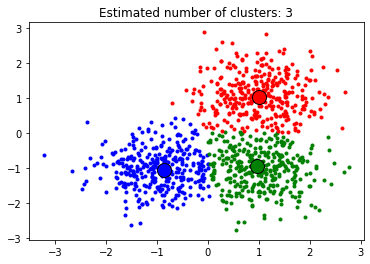

In [25]:

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()